## International Space Station (ISS) Tracking

Let's start with a simulation that, while not as profound, serves as an interesting introduction to using certain packages and coding structures that will be valuable for more complex projects. We will simulate the position of the International Space Station (ISS). The code is relatively simple and can be organized into three main blocks.

Firstly, we import the necessary packages for our simulation. The first one is **requests**, which allows us to make an HTTP request to obtain information from a web page and retrieve data, in this case, about the current position of the International Space Station. The next package is **pandas**, used to handle the JSON data obtained from the website and convert it into a tabular format for easy access and manipulation. The last two are visualization packages; **matplotlib** is used for creating graphical representations, while **basemap** enables us to generate a world map for projecting the acquired coordinates.

In [25]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Once our packages are imported, we first define the *url* from which we will obtain the desired ISS position data using the **requests** package. The data is interpreted as JSON format and stored in the variable *data*.

Next, using **pandas**, we create a DataFrame with the data to work with it conveniently. We then extract the latitude and longitude from the DataFrame.

In [26]:
url = 'http://api.open-notify.org/iss-now.json'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['iss_position'], index=[0])

latitude = float(df['latitude'].iloc[0])
longitude = float(df['longitude'].iloc[0])

With all this, we already have the coordinates with the current position of the ISS, only missing their representation. 
This can be done according to personal preference. In this example, I will create a world map using **basemap** and mark a point with latitude and longitude coordinates for simplicity.

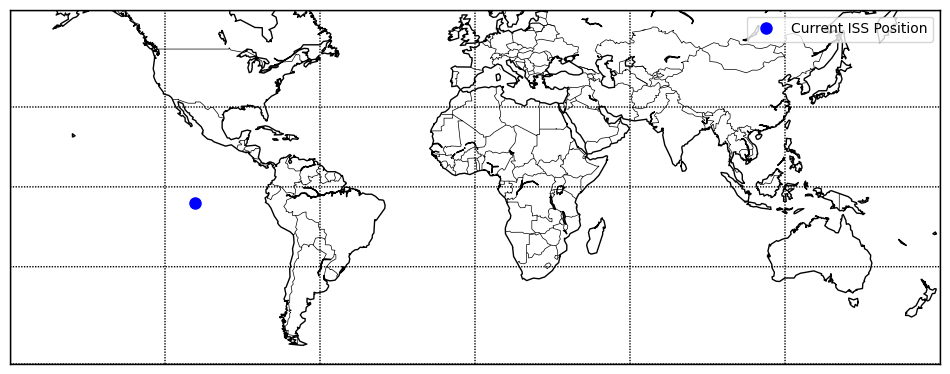

In [27]:
# Create a world map with Basemap
fig = plt.figure(figsize=(12, 9))
m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=60,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.drawparallels(range(-90, 91, 30))
m.drawmeridians(range(-180, 181, 60))

# Mark the position of the ISS in the map
x, y = m(longitude, latitude)
m.plot(x, y, markersize=8, color='blue', marker='o', linestyle='', label='Current ISS Position')

plt.legend()
plt.show()


This provides us with a world map with the current position of the ISS marked as a blue dot. 
The interesting aspect of this simulation, aside from the handling of various packages such as *pandas* or *requests*, is to observe how quickly the ISS moves across the map.

To better visualize the trajectory of the ISS, the previous code will be expanded to not only display the current position but also to save and visualize positions from past executions.

To achieve this, we build upon the previous code, introducing two functions to streamline the process. The first one, *get_iss_position*, returns the latitude and longitude coordinates, as previously explained. However, the second one, *save_position_to_csv*, creates a CSV file and stores the current coordinates. With each execution, the file is overwritten, adding new data.

In [28]:
# Function to get the current position of the ISS
def get_iss_position():
    url = 'http://api.open-notify.org/iss-now.json'
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data['iss_position'], index=[0])
    latitude = float(df['latitude'].iloc[0])
    longitude = float(df['longitude'].iloc[0])
    return latitude, longitude

# Function to save the coordinates to a CSV file
def save_position_to_csv(latitude, longitude, filename='iss_positions.csv'):
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        df = pd.DataFrame(columns=['Latitude', 'Longitude'])

    new_data = pd.DataFrame({'Latitude': [latitude], 'Longitude': [longitude]})
    df = pd.concat([df, new_data], ignore_index=True)
    df.to_csv(filename, index=False)

Using the defined functions, extract the coordinates, save them to the CSV file, and read existing coordinates from the file (if any).

In [29]:
# Get the current position of the ISS
latitude, longitude = get_iss_position()

# Save the coordinates to a CSV file
save_position_to_csv(latitude, longitude)

# Read all the stored positions from the CSV file
all_positions_df = pd.read_csv('iss_positions.csv')

Once all variables are defined, we proceed with the representation of the results, similar to the previous current position. However, we add representations of the previous coordinates (marked in gray).


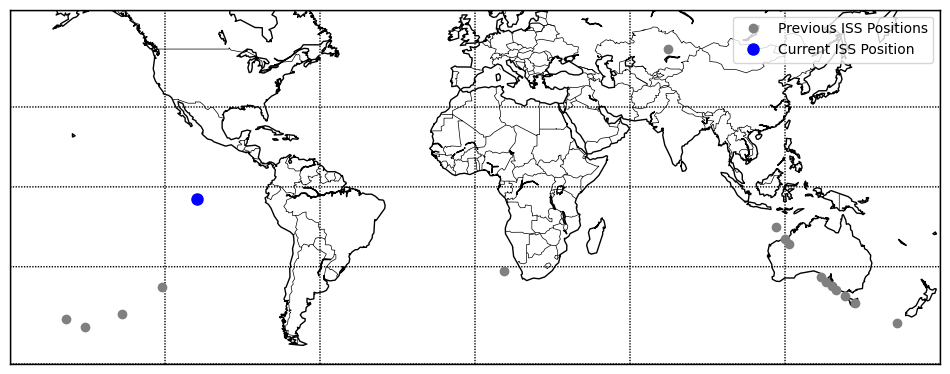

In [30]:
# Create a world map with Basemap
fig = plt.figure(figsize=(12, 9))
m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=60,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.drawparallels(range(-90, 91, 30))
m.drawmeridians(range(-180, 181, 60))

# Mark all stored positions on the map
x, y = m(all_positions_df['Longitude'], all_positions_df['Latitude'])
m.plot(x, y, markersize=6, color='gray', marker='o', linestyle='', label='Previous ISS Positions')
x_current, y_current = m(longitude, latitude)
m.plot(x_current, y_current, markersize=8, color='blue', marker='o', linestyle='', label='Current ISS Position')

plt.legend()
plt.show()